In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

import os.path

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.MNIST('./data',train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

testset = torchvision.datasets.MNIST('./data',train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

In [3]:
def imshow(img):
    print(img.shape)
    img = img /2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

#imshow(torchvision.utils.make_grid(images))

In [4]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        self.linear1 = nn.Linear(196,392)
        self.linear2 = nn.Linear(392,784)
        
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
Gnr = Generator()

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.linear1 = nn.Linear(784,392)
        self.linear2 = nn.Linear(392,196)
        self.linear3 = nn.Linear(196,1)
    
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = torch.sigmoid(self.linear3(x))
        return x
    
Dsc = Discriminator()

In [6]:
criterion = nn.BCELoss()
Gnr_optimizer = optim.Adam(Gnr.parameters(), lr=0.001, betas=(0.9,0.999))
Dsc_optimizer = optim.Adam(Dsc.parameters(), lr=0.001, betas=(0.9,0.999))

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

Gnr.to(device)
Dsc.to(device)

cuda:0


Discriminator(
  (linear1): Linear(in_features=784, out_features=392, bias=True)
  (linear2): Linear(in_features=392, out_features=196, bias=True)
  (linear3): Linear(in_features=196, out_features=1, bias=True)
)

0


/home/hsue/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


0 dsc finish
0 gnr finish
1
1 dsc finish
1 gnr finish
2
2 dsc finish
2 gnr finish
3
3 dsc finish
3 gnr finish
4
4 dsc finish
4 gnr finish
5
5 dsc finish
5 gnr finish
6
6 dsc finish
6 gnr finish
7
7 dsc finish
7 gnr finish
8
8 dsc finish
8 gnr finish
9
9 dsc finish
9 gnr finish
10
10 dsc finish
10 gnr finish
11
11 dsc finish
11 gnr finish
12
12 dsc finish
12 gnr finish
13
13 dsc finish
13 gnr finish
14
14 dsc finish
14 gnr finish
15
15 dsc finish
15 gnr finish
16
16 dsc finish
16 gnr finish
17
17 dsc finish
17 gnr finish
18
18 dsc finish
18 gnr finish
19
19 dsc finish
19 gnr finish
20
20 dsc finish
20 gnr finish
21


/home/hsue/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


21 dsc finish
21 gnr finish
22
22 dsc finish
22 gnr finish
23
23 dsc finish
23 gnr finish
24
24 dsc finish
24 gnr finish
25
25 dsc finish
25 gnr finish
26
26 dsc finish
26 gnr finish
27
27 dsc finish
27 gnr finish
28
28 dsc finish
28 gnr finish
29
29 dsc finish
29 gnr finish
30
30 dsc finish
30 gnr finish
31
31 dsc finish
31 gnr finish
32
32 dsc finish
32 gnr finish
33
33 dsc finish
33 gnr finish
34
34 dsc finish
34 gnr finish
35
35 dsc finish
35 gnr finish
36
36 dsc finish
36 gnr finish
37
37 dsc finish
37 gnr finish
38
38 dsc finish
38 gnr finish
39
39 dsc finish
39 gnr finish
40
40 dsc finish
40 gnr finish
41
41 dsc finish
41 gnr finish
42
42 dsc finish
42 gnr finish
43
43 dsc finish
43 gnr finish
44
44 dsc finish
44 gnr finish
45
45 dsc finish
45 gnr finish
46
46 dsc finish
46 gnr finish
47
47 dsc finish
47 gnr finish
48
48 dsc finish
48 gnr finish
49
49 dsc finish
49 gnr finish
50
50 dsc finish
50 gnr finish
51
51 dsc finish
51 gnr finish
52
52 dsc finish
52 gnr finish
53
53 dsc f

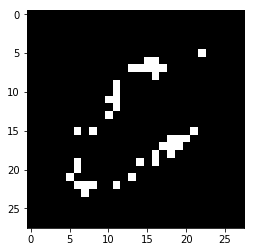

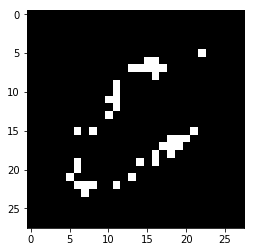

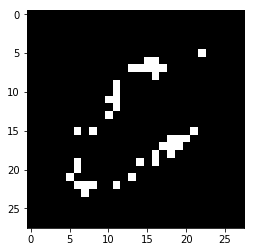

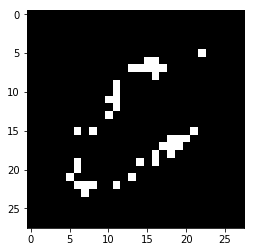

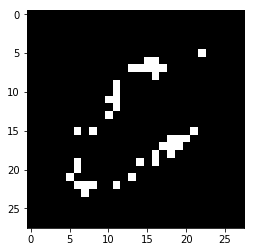

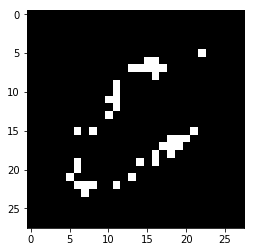

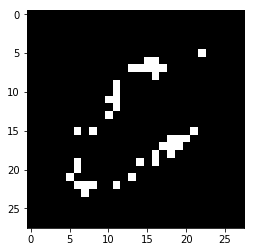

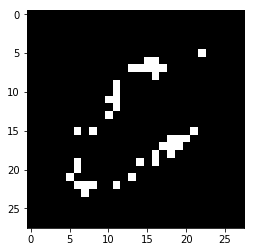

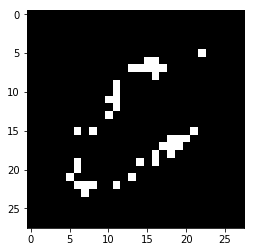

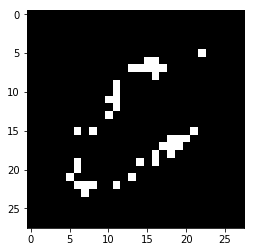

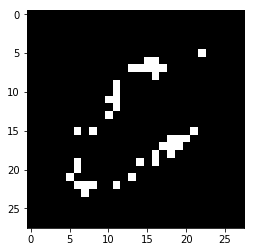

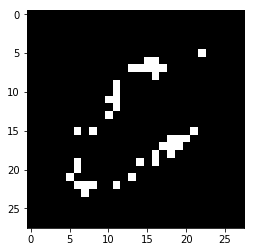

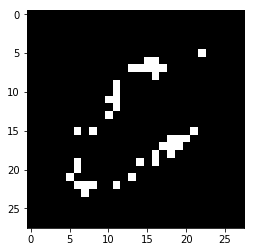

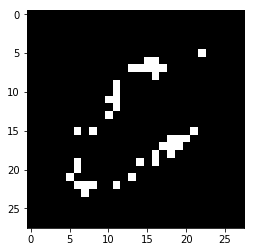

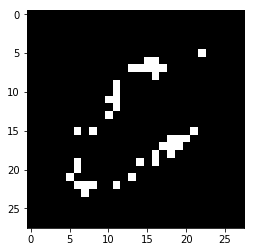

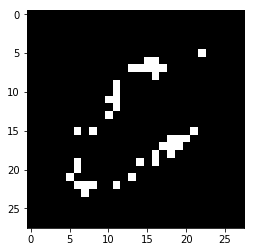

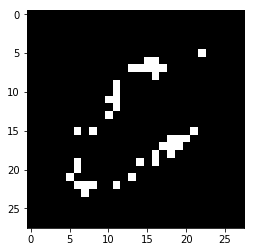

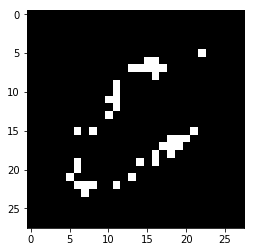

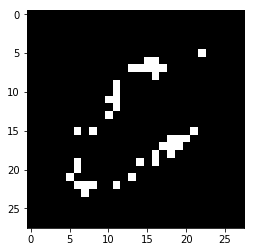

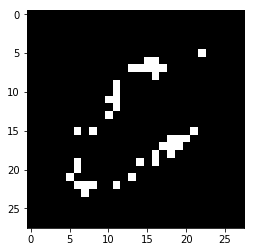

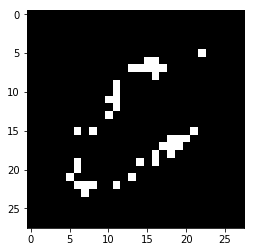

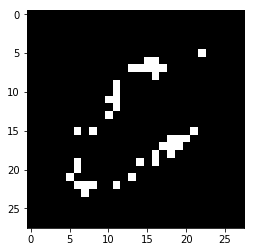

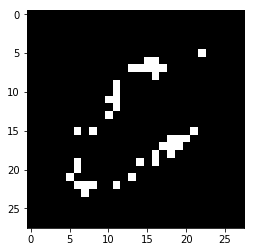

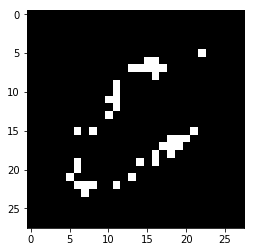

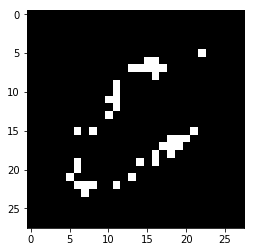

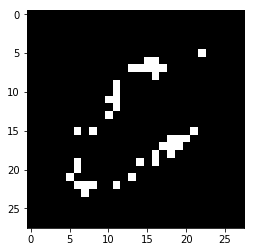

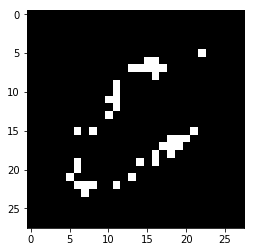

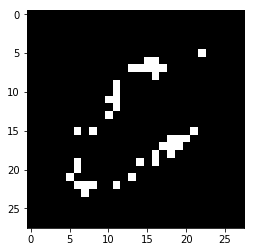

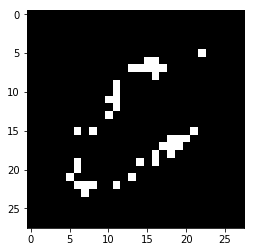

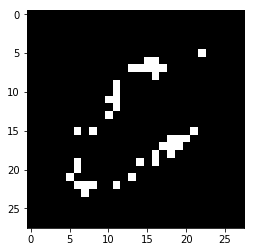

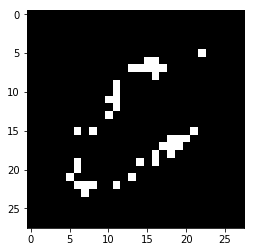

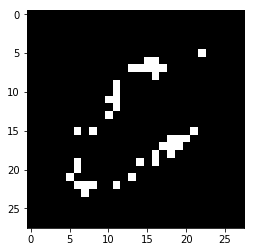

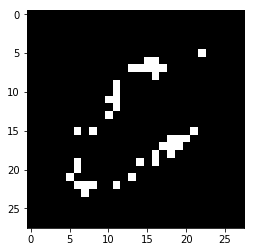

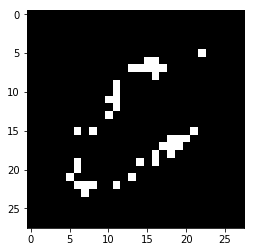

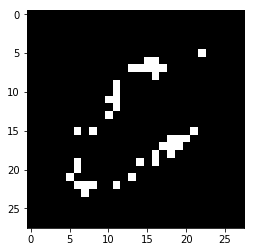

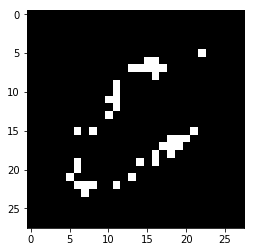

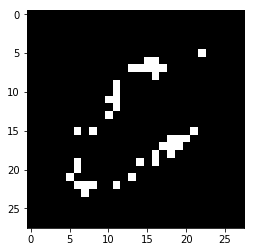

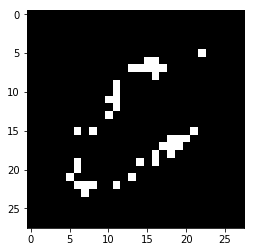

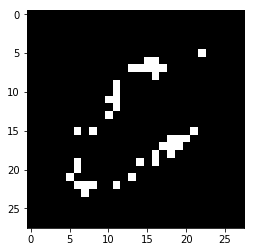

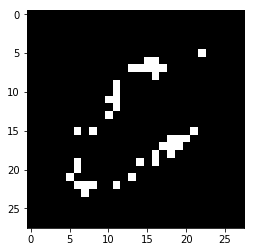

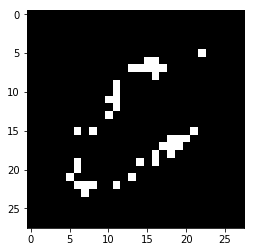

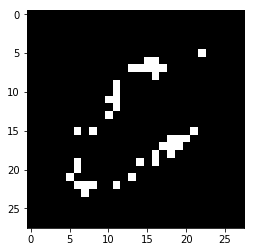

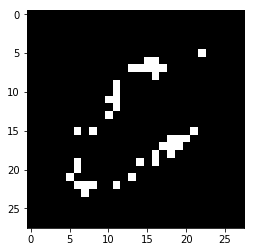

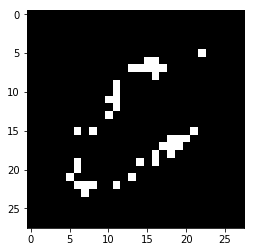

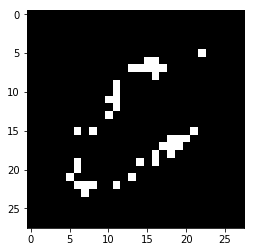

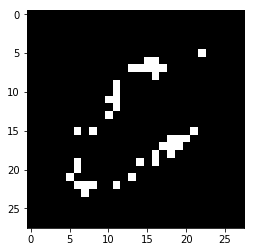

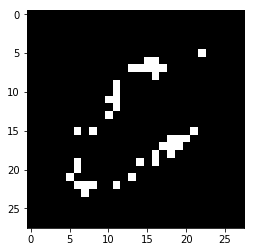

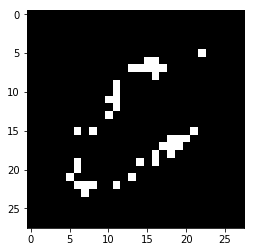

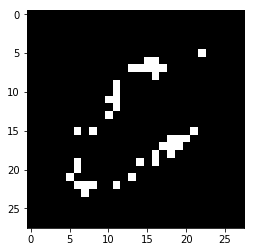

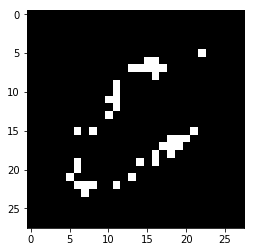

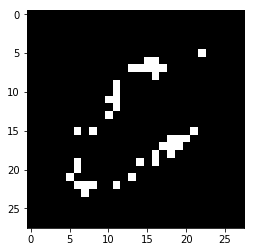

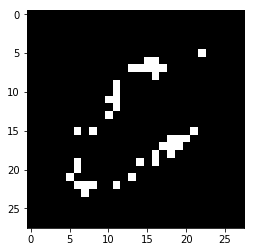

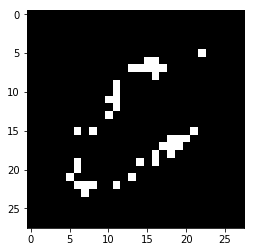

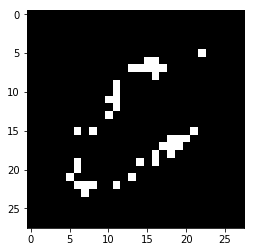

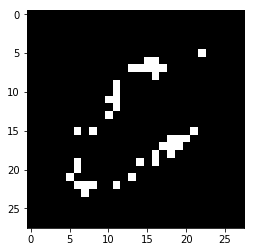

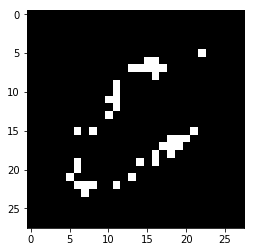

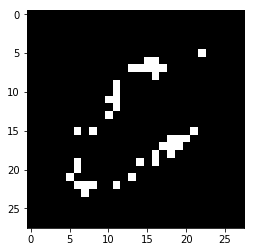

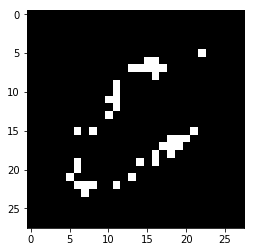

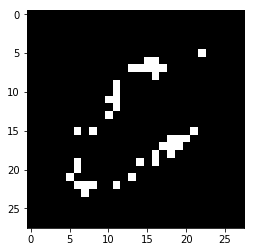

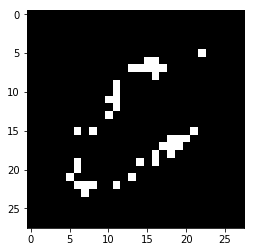

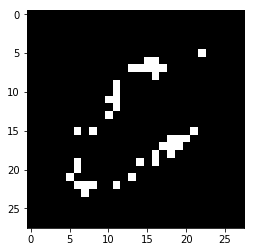

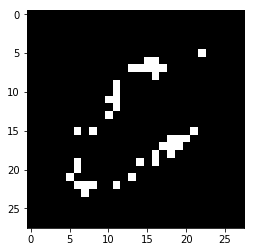

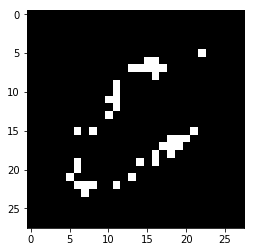

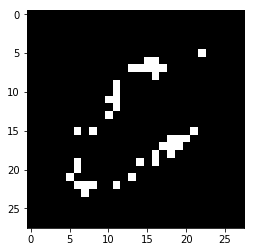

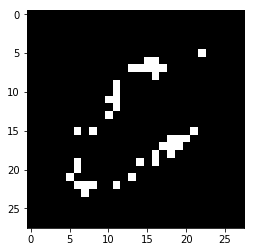

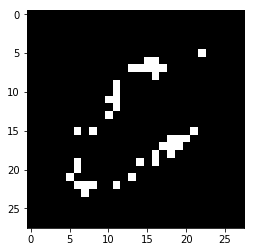

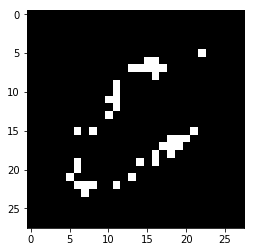

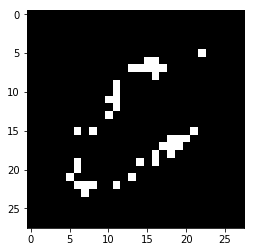

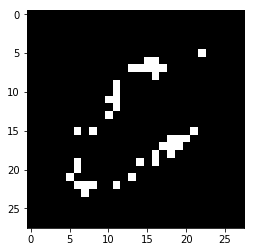

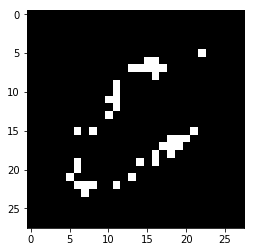

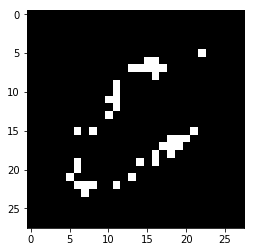

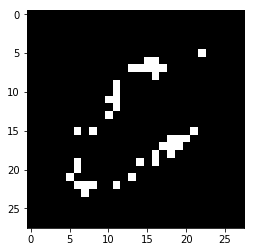

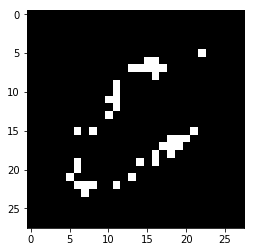

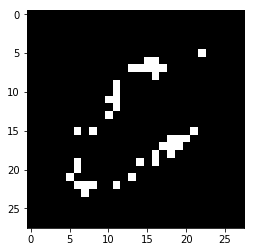

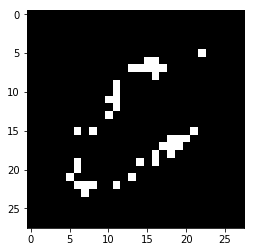

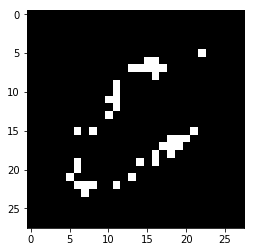

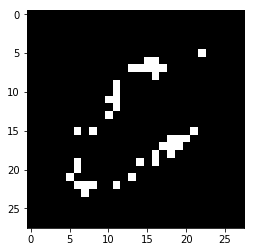

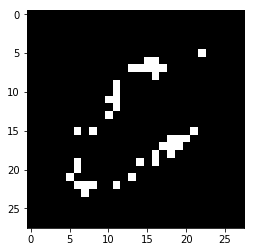

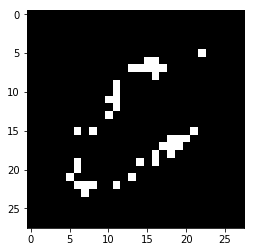

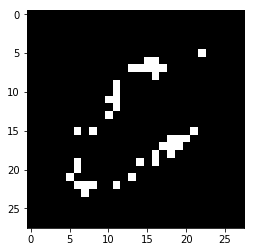

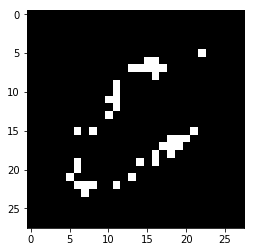

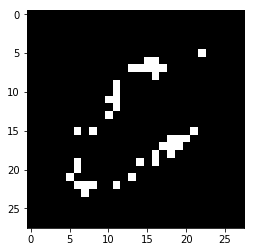

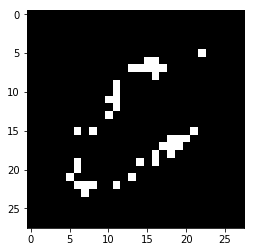

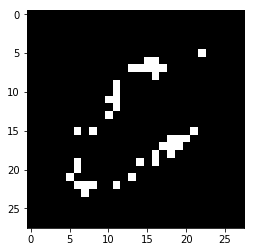

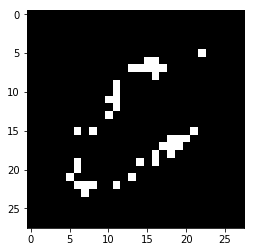

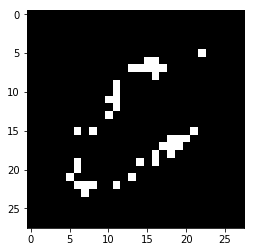

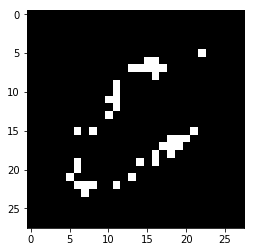

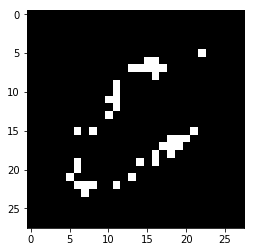

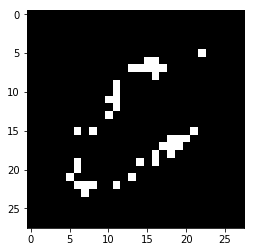

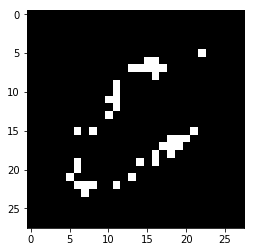

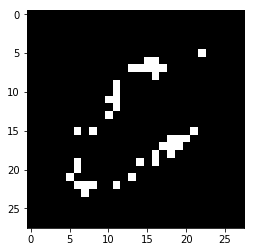

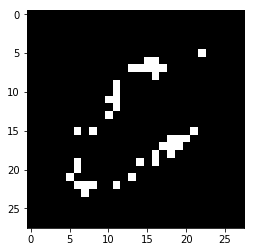

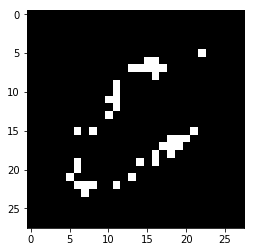

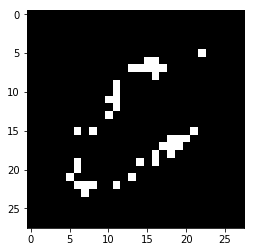

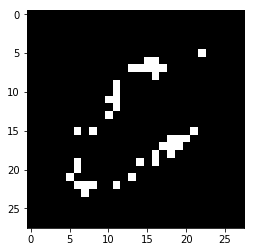

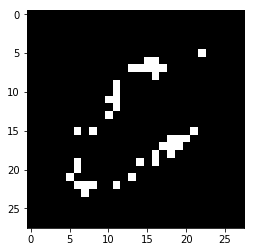

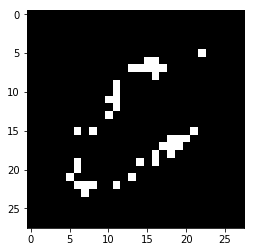

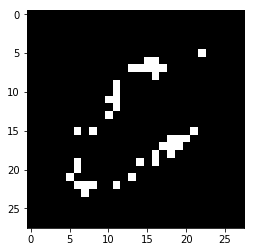

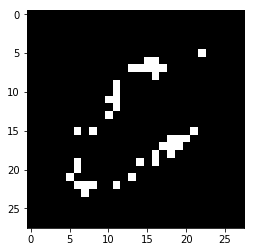

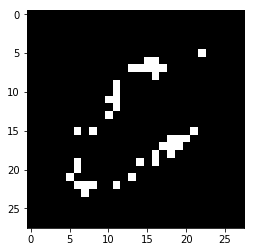

In [8]:
def preprocess(img):
    img = img[0]
    img = img.view(1,-1)
    return img

def noiseInput():
    return torch.randn(196)

if os.path.isfile('./gen.pth'):
    Gnr.load_state_dict(torch.load('./gen.pth'))
if os.path.isfile('./dsc.pth'):
    Dsc.load_state_dict(torch.load('./dsc.pth'))
        
for epoch in range(100):
    print(epoch)
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        inputs = preprocess(inputs).to(device)

        Dsc.zero_grad()
        dsc_real_result = Dsc(inputs)
        dsc_real_error = criterion(dsc_real_result, torch.ones(1).to(device))
        dsc_real_error.backward()

        noise = noiseInput().to(device)
        gnr_fake = Gnr(noise)
        dsc_fake_result = Dsc(gnr_fake)
        dsc_fake_error = criterion(dsc_fake_result,torch.zeros(1).to(device))
        dsc_fake_error.backward()
        Dsc_optimizer.step()
    print(epoch,'dsc finish')
    
    g_loop = i
    for g in range(g_loop):
        Gnr.zero_grad()
        noise = noiseInput().to(device)
        gnr_fake = Gnr(noise)
        dsc_gnr_fake_result = Dsc(gnr_fake)
        gnr_error = criterion(dsc_gnr_fake_result, torch.ones(1).to(device))
        gnr_error.backward()
        Gnr_optimizer.step()
    print(epoch,'gnr finish')
    
    torch.save(Gnr.state_dict(),'./gen.pth')
    torch.save(Dsc.state_dict(),'./dsc.pth')
    
    plt.figure(epoch)
    noise = noiseInput().to(device)
    gnr_fake = Gnr(noise)
    fake = gnr_fake.cpu()
    fake_img = fake.reshape((28,28)).detach().numpy()
    plt.imshow(fake_img, cmap='gray')


In [9]:
import os.path

if os.path.isfile('./gen.pth'):
    print('hey')
else:
    print('h')
"""def showImg(i, img_arr, g_img_arr):
    plt.figure(i)
    plt.subplot(1, 2, 1)
    img = img_arr[0][0]
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(g_img, cmap='gray')
    
print(testset[0][0].shape)
img = testset[0][0][0]
plt.imshow(img, cmap='gray')
testimg = testset[0]



for i, data in enumerate(testloader, 0):    
        inputs, labels = data
        plt.figure(1)
        print(inputs[0][0].shape)
        img = inputs[0][0]
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        noise = noiseInput()
        gnr_fake = Gnr(noise)
        noise = gnr_fake
        noiseimg = noise.reshape((28,28))
        plt.subplot(1, 2, 2)
        plt.imshow(noiseimg, cmap='gray')
        break
        """

hey


"def showImg(i, img_arr, g_img_arr):\n    plt.figure(i)\n    plt.subplot(1, 2, 1)\n    img = img_arr[0][0]\n    plt.imshow(img, cmap='gray')\n    plt.subplot(1, 2, 2)\n    plt.imshow(g_img, cmap='gray')\n    \nprint(testset[0][0].shape)\nimg = testset[0][0][0]\nplt.imshow(img, cmap='gray')\ntestimg = testset[0]\n\n\n\nfor i, data in enumerate(testloader, 0):    \n        inputs, labels = data\n        plt.figure(1)\n        print(inputs[0][0].shape)\n        img = inputs[0][0]\n        plt.subplot(1, 2, 1)\n        plt.imshow(img, cmap='gray')\n        noise = noiseInput()\n        gnr_fake = Gnr(noise)\n        noise = gnr_fake\n        noiseimg = noise.reshape((28,28))\n        plt.subplot(1, 2, 2)\n        plt.imshow(noiseimg, cmap='gray')\n        break\n        "